Model Accuracy: 100.00%


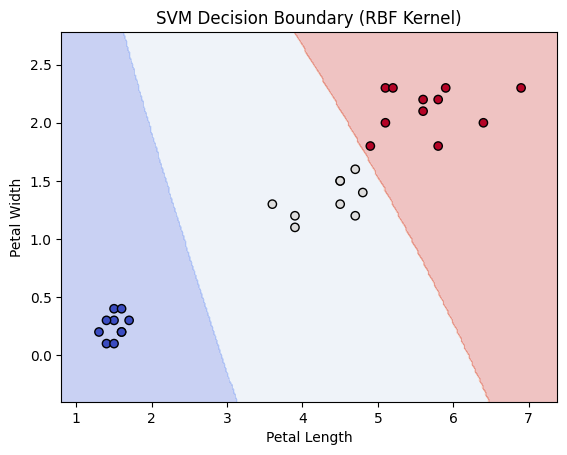

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load Data
iris = datasets.load_iris()
X = iris.data[:, 2:]  # Use only Petal Length and Petal Width
y = iris.target

# 2. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train SVM Model
# We use RBF Kernel (Chapter 5) and Soft Margin C=1.0 (Chapter 6)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovo')
svm_model.fit(X_train, y_train)

# 4. Evaluation
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# 5. Visualization of Decision Boundaries
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.title('SVM Decision Boundary (RBF Kernel)')
    plt.show()

plot_decision_boundary(X_test, y_test, svm_model)